In [ ]:
import pandas as pd

# Buat contoh DataFrame produk
data_produk = {
    'nama': ['ChaCha', 'Chitato', 'Bintang', 'Sprite', 'Fanta','UltraMilk','Piatos'],
    'harga': [10000, 15000, 35000, 15000, 15000,15000,10000]
}
df_produk = pd.DataFrame(data_produk)

# Simpan ke file CSV
df_produk.to_csv('produk_tersedia.csv', index=False)

print("File 'produk_tersedia.csv' berhasil dibuat!")

File 'produk_tersedia.csv' berhasil dibuat!


In [ ]:
# OOP Class Sistem Kasir

class Kasir:
    def __init__(self):
        self.keranjang = {}  # dictionary untuk nyimpen barang belanjaan.
        self.daftar_produk_tersedia = {} # dictionary untuk menyimpan daftar produk yang tersedia dari dataset

    def muat_produk_dari_csv(self, filename): # Untuk membaca data set
        try:
            df = pd.read_csv(filename)
            for index, row in df.iterrows():
                nama = row['nama']
                harga = row['harga']
                self.daftar_produk_tersedia[nama] = {"harga": harga}
            print(f" Produk dari '{filename}' berhasil dimuat ke daftar produk tersedia!")
        except FileNotFoundError:
            print(f" File '{filename}' tidak ditemukan!")
        except KeyError:
            print(" Format CSV tidak sesuai. Pastikan ada kolom 'nama' dan 'harga'.")

    def tambah_barang(self, nama, qty):
        # Jika harga tidak disediakan, coba ambil dari daftar produk tersedia
        harga = None
        if harga is None:
            if nama in self.daftar_produk_tersedia:
                harga = self.daftar_produk_tersedia[nama]["harga"]
            else:
                print(f" Harga untuk {nama} tidak ditemukan dan tidak ada dalam daftar produk tersedia!")
                return

        if nama in self.keranjang:
            self.keranjang[nama]["jumlah"] += qty
        else:
            self.keranjang[nama] = {"harga": harga, "jumlah": qty}
        print(f" {nama} berhasil ditambahkan!")

    def hapus_barang(self, nama):
        try:
            del self.keranjang[nama]
            print(f" {nama} berhasil dihapus!")
        except KeyError:
            print(" Barang tidak ditemukan!")

    def ubah_jumlah(self, nama, qty):
        try:
            self.keranjang[nama]["jumlah"] = qty
            print(f" Jumlah {nama} diperbarui!")
        except KeyError:
            print(" Barang tidak ada!")

    def total_harga(self):
        total = sum(item["harga"] * item["jumlah"]
                    for item in self.keranjang.values())
        return total

    def cetak_struk(self):
        print("\n=== STRUK PEMBELIAN ===")
        for nama, data in self.keranjang.items():
            print(f"{nama} x{data['jumlah']} = Rp {data['harga'] * data['jumlah']}")
        print("----------------------")
        print(f"TOTAL = Rp {self.total_harga()}")

In [ ]:
import os   # import modul os (belum dipakai, tapi biasanya untuk operasi file)

kasir = Kasir() # Re-inisialisasi objek kasir setelah kelas diubah
kasir.muat_produk_dari_csv('produk_tersedia.csv')

# Lambda untuk format rupiah
rupiah = lambda x: f"Rp {format(x, ',').replace(',', '.')}" # fungsi untuk mengubah angka ke format rupiah

def simpan_ke_file():                       # fungsi untuk menyimpan struk belanja ke file
    with open("struk.txt", "w") as f:       # membuka file struk .txt dalam mode tulis (write)
        f.write("=== STRUK PEMBELIAN ===\n") # menulis judul struk ke dalam file
        for nama, data in kasir.keranjang.items(): # Loop untuk menulis setiap barang ke file
            f.write(f"{nama} x{data['jumlah']} = {rupiah(data['harga'] * data['jumlah'])}\n")
        f.write("---------------------\n")   # garis pemisah
        f.write(f"TOTAL = {rupiah(kasir.total_harga())}\n") # menulis total seluruh belanja
    print(" Struk berhasil disimpan ke file 'struk.txt'!") # pesan bahwa file berhasil dibuat


def menu():     # fungsi utama yang menampilkan menu dan mengatur alur program
    while True: # loop sampai user memilih keluar
        print("\n===== SISTEM KASIR =====") # judul menu
        print("1. Tambah Barang")  # opsi 1: tambah item ke keranjang
        print("2. Hapus Barang")  # opsi 2: hapus item dari kerajang
        print("3. Ubah Jumlah Barang") # opsi 3: mengubah jumlah item
        print("4. Lihat Keranjang") # opsi 4: menampilkan isi keranjang
        print("5. Cetak Struk") # opsi 5: simpan struk ke layar
        print("6. Simpan ke File") # opsi 6: simpan struk ke file
        print("7. Keluar")  # opsi 7: keluar dari program

        try: #mencoba mennjalankan blok input angka
            pilih = int(input("Pilih menu: ")) # membaca pilihan menu dan mengubahnya menjadi integer
        except ValueError: # jika input bukan angka
            print(" Masukkan angka!") # memberi tahu pengguna bahwa  input salah
            continue  # kembali ke awal loop menu

        if pilih == 1: # mengecek appakah pengguna memilih menu nomer 1 bertambah ke keranjang atau tidak
            try: # memastikan input barang valid
                nama = input("Nama barang: ") # membaca nama barang yang ingin ditambahkan
                qty = int(input("Jumlah: ")) # input jumlah barang dan wajib angka
                kasir.tambah_barang(nama, qty) # memanggil fungsi untuk menambahkan barang
            except:  # jika ada input yang tidak valid
                print(" Input tidak valid!") # untuk menampilkan pesan kesalahan

        elif pilih == 2: #untuk pengecekan apakah pengguna memilih menu hapus barang
            nama = input("Nama barang yang ingin dihapus: ") # membaca nama barang
            kasir.hapus_barang(nama) # memanggil fungsi menghapus barang

        elif pilih == 3: #pengguna memilih menu ubah jumlah barang.
            nama = input("Nama barang: ") # membaca nama barang
            try: #mencoba membaca jumlah baru
                qty = int(input("Jumlah baru: ")) # input jumlah baru dan harus angka
                kasir.ubah_jumlah(nama, qty) # untuk memanggil fungsi ubah jumlah
            except: # jika jumlah bukan angka
                print(" Jumlah harus angka!") # memberi tahu pengguna jika format salah

        elif pilih == 4: #pengguna menampilkan, barang yang dipilih.
            print("\n=== Keranjang Belanja ===") # judul tampilan keranjang
            for nama, data in kasir.keranjang.items(): # Looping setiap barang dalam keranjang
                print(f"{nama} - {data['jumlah']} pcs - {rupiah(data['harga'])}") # menampilkan nama, jumlah, dan harga barang

            print("Total =", rupiah(kasir.total_harga())) # menampilkan total harga seluruh barang

        elif pilih == 5: #pengguna memilih menu ubah jumlah barang
            kasir.cetak_struk() # memanggil fungsi cetak struk

        elif pilih == 6: #pengguna memilih menu ubah jumlah barang
            simpan_ke_file() # menjalankan fungsi penyimpanan data ke file

        elif pilih == 7:#pengguna memilih menu ubah jumlah barang
            print("Terima kasih!") # memberi pesan perpisahan
            break # menghentikan loop dan keluar dari program

        else: # jika input menu tidak sesuai 1–7
            print(" Menu tidak ada!") # memberi tahu user bahwa menu tidak valid

 Produk dari 'produk_tersedia.csv' berhasil dimuat ke daftar produk tersedia!


In [ ]:
menu()



===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: 1
Nama barang: mentos
Jumlah: 7
 Harga untuk mentos tidak ditemukan dan tidak ada dalam daftar produk tersedia!

===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: ChaCha
 Masukkan angka!

===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: 4

=== Keranjang Belanja ===
Total = Rp 0

===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: ChaCha
 Masukkan angka!

===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: Chitato
 Masukkan angka

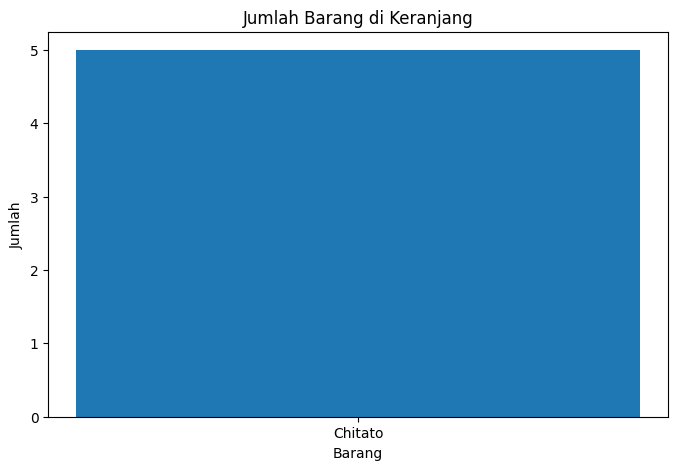

In [ ]:
import matplotlib.pyplot as plt   # mengimpor library matplotlib untuk membuat grafik

def visualisasi():  # mendefinisikan fungsi visualisasi
    if not kasir.keranjang:  # mengecek apakah keranjang masih kosong
        print("Keranjang kosong!") # pesan jika tidak ada barang
        return   # menghentikan fungsi agar tidak lanjut ke plotting

    barang = list(kasir.keranjang.keys()) # mengambil daftar nama barang dari keranjang
    jumlah = [kasir.keranjang[b]["jumlah"] for b in barang] # mengambil jumlah setiap barang

    plt.figure(figsize=(8,5))  # membuat canvas grafik dengan ukuran 8x5 inci
    plt.bar(barang, jumlah)    # membuat grafik batang: nama barang vs jumlah
    plt.title("Jumlah Barang di Keranjang")  # judul grafik
    plt.xlabel("Barang")              # label sumbu X
    plt.ylabel("Jumlah")              # label sumbu Y
    plt.show()                        # menampilkan grafik ke layar

# Jalankan kapan saja
visualisasi()                        # memanggil fungsi untuk menampilkan grafik


In [ ]:
menu()



===== SISTEM KASIR =====
1. Tambah Barang
2. Hapus Barang
3. Ubah Jumlah Barang
4. Lihat Keranjang
5. Cetak Struk
6. Simpan ke File
7. Keluar
Pilih menu: 7
Terima kasih!
